# Clustering Analysis
Author: Abhishek Narvekar<br>
Student number: 649744<br>
Date: 07/04/2023<br>
Dataset: 'Soccer2019C.csv', taken from moodle from the data mining and stastics course.

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* matplotlib
* sklearn
* yellowbrick
* scipy
* hdbscan
* seaborn

From these we will need the following libraries:

In [1]:
# enter here all those 'from .... import ....'
try:
    import numpy as np
    print("numpy already installed, only imported")
except:
    !pip install numpy
    print("numpy was not installed, installed and imported")

try:
    import pandas as pd
    print("pandas already installed, only imported")
except:
    !pip install pandas
    print("pandas was not installed, installed and imported")
try:
    from matplotlib import pyplot as plt
    print("matplotlib was already installed, only imported")
except:
    !pip install matplotlib
    print("matplotlib was not installed, installed and imported")
try:
    from sklearn.cluster import KMeans
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.neighbors import NearestNeighbors
    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    print("sklearn was already installed, only imported")
except:
    !pip install sklearn
    print("sklearn was not installed, installed and imported")
try:
    from yellowbrick.cluster import KElbowVisualizer
    print("yellow was already installed, only imported")
except:
    !pip install yellowbrick
    from yellowbrick.cluster import KElbowVisualizer
    print("yellowbrick was not installed, installed and imported")
try:
    from scipy.cluster.hierarchy import dendrogram, linkage
    print("scipy was already installed, only imported")
except:
    !pip install scipy
    print("scipy was not installed, installed and imported")
try:
    import hdbscan
    print("hdbscan was already installed, only imported")
except:
    !pip install hdbscan
    print("hdbscan was not installed, only imported")
try:
    import seaborn as sns
    print("seaborn was installed, only imported")
except:
    !pip install seaborn
    print("seaborn was not installed, installed and imported")



numpy already installed, only imported
pandas already installed, only imported
matplotlib was already installed, only imported
sklearn was already installed, only imported
yellow was already installed, only imported
scipy was already installed, only imported
hdbscan was already installed, only imported
seaborn was installed, only imported


# 1. The Soccer Classification

In the Jupyter Notebook from lecture 6 there was one exercise using the k-means clustering, using the Soccer data. In this chapter we'll repeat that and also see how the other models perform with this data.

First we'll need to load the data itself.

In [2]:
# enter code to load the Soccer2019C.csv file
soccer2019DF = pd.read_csv("Soccer2019C.csv")

We were interested to find any classes in 'Finishing' and 'HeadingAccuracy'. So lets select those from the data.

In [3]:
# enter code to select the two variables, make sure to also remove the missing values.
combinedX = soccer2019DF[[ 'Finishing', 'HeadingAccuracy' ]]

#remove any null values if there is in the variables
combinedX = combinedX.dropna()

combinedX.head()

,Finishing,HeadingAccuracy
0,87,62
1,95,70
2,82,55
3,84,61
4,84,68


A visual might be nice, so lets show the scatterplot of these two:

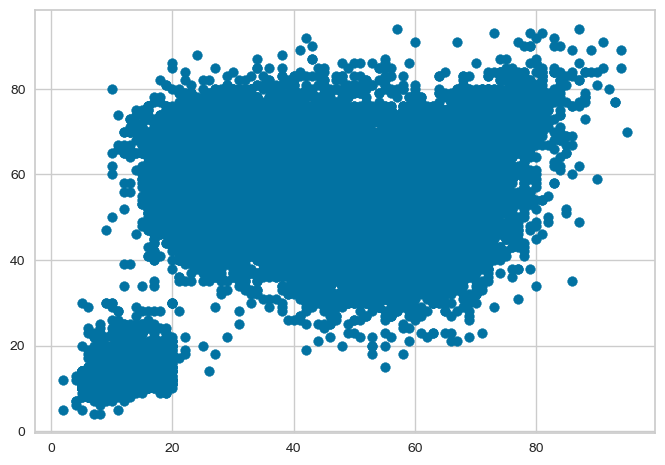

In [4]:
# code to create the scatterplot
plt.scatter(combinedX['Finishing'], combinedX['HeadingAccuracy'])

The scatterplot represents an overview of finishing and heading accuracy of the football(soccer) players from our dataset. Based on the visual itself, the scatterplot shows two clusters. The first small cluster is characterised with low finishing and low heading accuracy.The other large cluster taking major part of the graph characterise with high finishing and high heading accuracy. This scatterplot might state that the major part of the soccer players in our dataset have more high finishing and heading accuracy rates and very few players have low finishing and heading accuracy rates, This is why we have one large cluster and one small cluster. So the number of cluster we should expect based upon the visual is 2.

Now that we have the data, lets begin with the classification.

# 1.1. K-Means

The first, and probably most famous, technique discussed was the k-means. 

**This explaination was done using the video lectures of Data Mining and Stastics on moodle made by Mr Peter Stikker**

**The images in the examples were taken from the video lectures made by Mr Peter Stikker**

K-Means is a most favoured method used in clustering.This is a method based on 'centroid' which as the word states, this method uses a 'center'. This method considers that clusters form some form of center in the graph.

Now, the K-Means method can be used with one-dimensional(one-variable) dataset and two-dimensional(two-variables) Dataset. 

Since in this assignment we are using two variables we will understand how the K-Means method works with 2-Dimensional Datatsets

Let us understand how this method works with an example:

The graph below is a simple sample graph with x1 and x2 axis and has some data points datapoints. Our objective is to cluster the data using the K-means techinque.
<div style="text-align: left;"><img src="../assignment_6/images/k_Means_example_1.png" alt="part_1" width="200" height="200"></div>

Step 1: First we start by picking some random points from our graph, denoted it by 'k', so In this example let's say k = 2 in the image below.The points k = 2 are in blue and pink. 
<div style="text-align: left;"><img src="../assignment_6/images/k_Means_example_2.png" alt="part_2" width="200" height="200"></div>

Step 2: We assign the points that closest to the choosen k values datapoints in the previous step, which means assign points that are closest to the cluster. So the point above the blue point is will come inside the blue point cluster and all the other points are closest to pink point so it will come in the pink point cluster. The visual representation of these points are given below.
<div style="text-align: left;"><img src="../assignment_6/images/k_Means_example_3.png" alt="part_3" width="200" height="200"></div>


Step3: In this step we have find the new center based on the clusters that was formed for blue and pink in the previous step. So we calculate the center for blue and denote it by 'x' and the same goes for the pink cluster.
The visual representation is mentioned below:
<div style="text-align: left;"><img src="../assignment_6/images/k_Means_example_4.png" alt="part_4" width="200" height="200"></div>

Step 4: We will then repeat previous step which is step 3 and then calculate a new center for both the pink and blue cluster, based upon the new points of cluster formed. A visual representation of the new center is given below:
<div style="text-align: left;"><img src="../assignment_6/images/k_Means_example_5.png" alt="part_5" width="200" height="200"></div>

So, we keep on repeating these steps until the graph reaches to a point of stability.
So this is how the k-Means method is done with two variables. Executing this menthod by hand seems to be a bit tedious. So we will have a look at certain methods in python that could be used for k-Means.

**Keywords**

**cluster**: The blob shape items made on the previous scatterplot graph. This is basically a collection of a particular set or a collection of data which is arranged together due to some similarities in the properties.

**centroid**: This is a particular point which in our data we assume to be the center of the group of cluster.

We think there are two clusters, so lets first use that and set the k-means model using k=2. We'll use Elkan's algorithm, rather than full just to speed things along.

In [5]:
%%timeit
# code to create and fit the k-means model (with elkan and full) 
#K-means using the elkan algorithm
knMeans_elkan = KMeans(init='random', algorithm='elkan', n_clusters=2, random_state=0)
knMeans_elkan.fit(combinedX)

174 ms ± 3.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
#K-means using the full algorithm
knMeans_full = KMeans(init='random', algorithm='full', n_clusters=2, random_state=0)
knMeans_full.fit(combinedX)


1.13 s ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Great, now lets see the result...

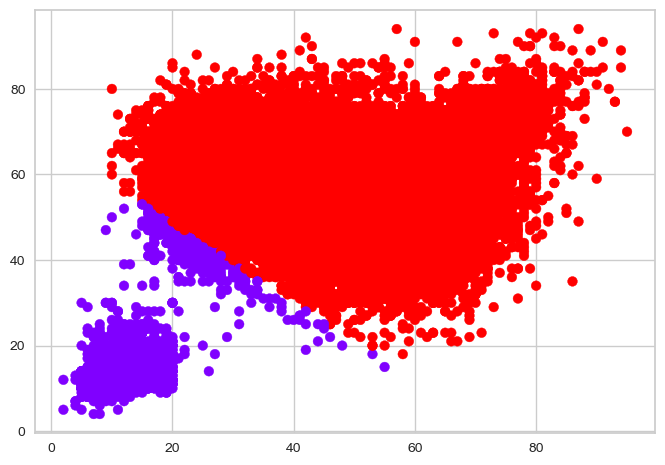

In [7]:
# code to create scatterplot with the classification
knMeans_elkan = KMeans(init='random', algorithm='elkan', n_clusters=2, random_state=0)
knMeans_elkan.fit(combinedX)
plt.scatter(combinedX['Finishing'], combinedX['HeadingAccuracy'], c=knMeans_elkan.labels_, cmap='rainbow')

The scatterplot of k-means shows two  clusters being formed, both clusters are denoted in purple and red color. The red one being the big cluster and the purple one being the small cluster.Every Single datapoint in the scatterplot has been assigned to either the purple or red cluster. Therefore dont particularly see any outliers in this scatterplot. We also see that the purple and red clusters are not being seperated properly and there is some level of overlapping with the datapoints.This may incidcate to us that the k-means techinque was not able to effectively seperate the data properly.

This result is something that was not expected. Based on the scatterplot that we obtained from chapter 1 we throught that there are two distinct clusters already the small cluster on the bottom left and and big cluster covering the most part of the graph. So comparing the scatterplot obtained from chapter 1 and the scatterplot of k-Means we realised that there are some datapoints in the big cluster that are a part of the small cluster.

The reason for this could be because of the kmeans techinque sets the closest datapointpoint to each cluster and keeps on changing the center of the cluster. This could lead to not clear seperation between the two clusters in the scatterplot.


Perhaps another initialization method works better. K-means++ is quite popular. 

K-Means++ techinque meakes sure that the initial centroids are properly distributed across the scatterplot graph, avoiding the issue of the random selections of the datapoints, where the centroid of them can be too far or too close to the datapoints. This ensures the the k-means++ results in better clustering performance than k-means method. The steps below describes how the method works:

Step 1: A datapoint is choosen randomly from the set of datapoints in the scatterplot graph.

Step 2: Decide the distance for each and every datapoint inside the scatter plot graph to the randomly selected datapoint in the previous step. This is then used as 'weights' to choose the next datapoint in the scatterplot graph. This step makes sure that the datapoints are very well-spaced out and representative of all the datapoints.

Step 3: Once the initial datapoints are selected then the rest of k-means++ algorithm proceeds as usual as the k-means algorithm, wherein the datapoints are being assigned to the nearest centroid of the cluster, which is then updated mainly upon the mean of the datapoints in the clusters.

**keywords**

**weights**: This points out to the probability used to choose the new centroid based upon the distance in the existing centroid.This makes the new centroids well spaced and representiative of all the datapoints in the scatterplot graph.

**This text was also generated using video lectures of Mr Peter Sikker.**
**The link referenced for stating the differences between the k-means and k-means++**: https://iq.opengenus.org/k-means-vs-k-means-p/ 

Lets see:

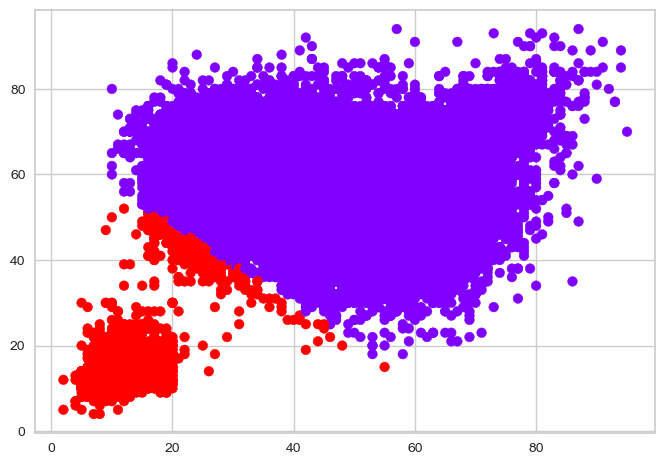

In [15]:
# code to create and fit the k-means++ (elkan) and also show the scatterplot
kmeans_elkan_plus = KMeans(init='k-means++', algorithm='elkan', n_clusters=2, random_state=0)
kmeans_elkan_plus.fit(combinedX)
plt.scatter(combinedX['Finishing'], combinedX['HeadingAccuracy'], c=kmeans_elkan_plus.labels_, cmap='rainbow')

The results are still mostly the same as the results obtained using the k-means techinque. We still see two clusters, one big cluster marked in purple and the small cluster marked in red. The clusters are still not seperated properly and still the datapoints red and purple overlap with each other. This is not something that was expected because the method k-means++ smartly selects the centroids in way that is representative of all the datapoints in a scatterplot graph, This further leads to better and accurate clustering results than the k-Means techinque which selects the centroids randomly. This could mean that perhaps there are more number of clusters than that we considered simply based upon the visual of the scatterplot graph.

Perhaps the k=2 is wrong. We could try to iterate over different values of k and measure the performance with a few different metrics.

We'll use the same function as in the Jupyter Notebook from the lecture:

In [12]:
# copy the elbowPlot function, and if you like you can adjust it.
# code below is taken from the jupyter notebook made by Mr Peter Stikker
def elbowPlot(data, model, kRange):

    # set the plotting stage for later
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, constrained_layout=True,figsize=(15,5))

    # Using the Distortion measure:
    visualizer = KElbowVisualizer(model, k=kRange, metric='distortion', ax=ax1)
    chPlot=visualizer.fit(data)
    ax1.set_title('Distortion')

    # Using the Calinski-Harabasz measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='calinski_harabasz', ax=ax2)
    chPlot=visualizer.fit(data)
    ax2.set_title('Calinski-Harabasz')

    # Using the Silhouette measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='silhouette', ax=ax3)
    chPlot=visualizer.fit(data)
    ax3.set_title('Silhouette')

    # Show the results
    plt.show()

Now lets see what this gives for our Soccer data:

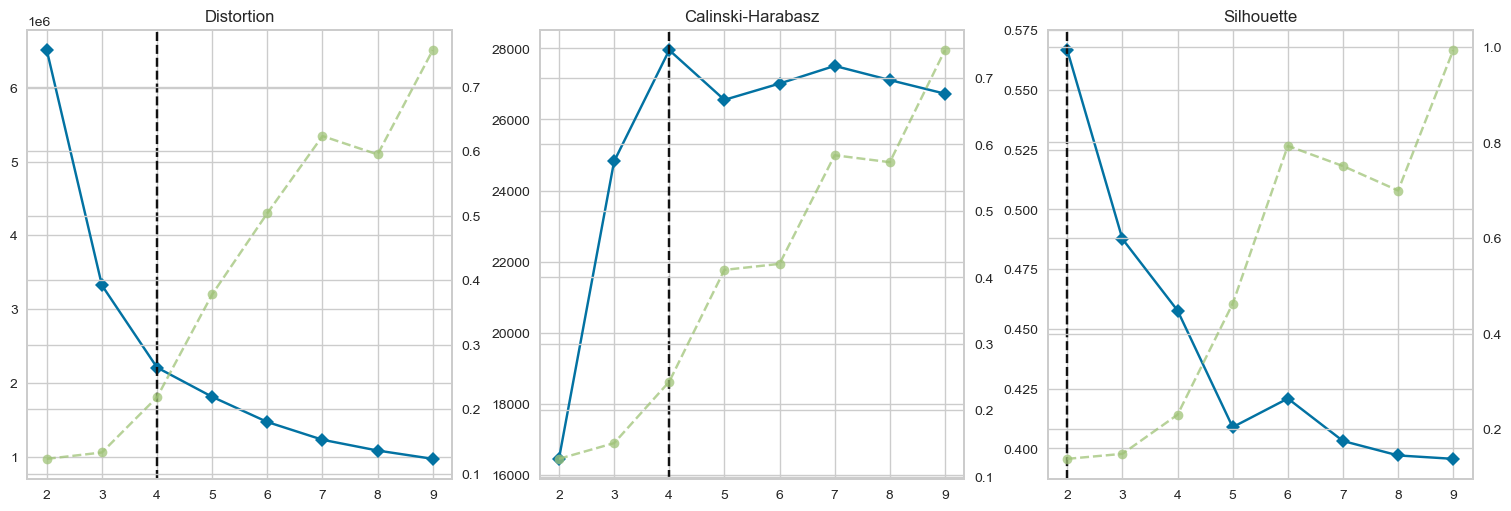

In [16]:
# code to show the three elbow plots (this might take a little time)
elbowPlot(combinedX, kmeans_elkan_plus, (2, 10))

Before analyzing the results let us understand what do the metrics 'Distortion', 'Calinski-Harabaz' and 'Silhouette' actually mesure:

**Distortion**: This method tries the minimize the variation factor within each cluster. So the variation factor is preferred to be as lowest as possiable. The word variation typically refers to how the datapoints in a scatterplot are spread within each cluster. It evaluates the sum of its distances squared between each datapoint for its assigned centroid.It provides an easy and inituitive measure of the quality of the clusters by checking how compact the clusters are and the distances to its datapoints with the centroid assigned to it.

**explaination for disortation was also created using the video lectures on moodle made by Mr Peter Stikker**

The link referenced  for the above text for Distortion: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html 

**Calinski-Harabaz**: It calculates the ratio of sum of the variation between clusters and the ratio of sum of variance within-cluster. So we select the clusters that are furtherest from each other and we also want to select the datapoints within the cluster that are close to each other as possiable and then calculate the ratio of the two sums.

**explaination for Calinski-Harabaz was also created using the video lectures on moodle made by Mr Peter Stikker**

**Silhouette**: This metric measure the overall qaulity of the clustering solution. It does this by evaluating the similarity of a particular object having the cluster of its own and compares this with the other clusters within the scatterplot. It determines how close the datapoints are compared to the other datapoints, so the greater the distance the better. It uses Silhoutette Coefficient and its value ranges from -1 to 1. 1 meaning that the clusters are properly seperated from each other. 0 meaning that the distance between the cluster is not significant and -1 meaning that the clusters are not properly assigned or are incorrect.  

**explaination for Silhouette was also created using the video lectures on moodle made by Mr Peter Stikker**

**part of some text is also explained using the link below**
The link referenced  for the above text for Silhouette: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c 


Based on the results obtained from the elbowplot we get the values k = 4 for Distortion and Calinski-Harabasz but a different k value, which is k = 2 for Silhouette. This may tell us that the optimal value of k is not still clear and we maybe have find out the optimal value using some other techinques. Since we have understood that k = 2 is not a good choice we could ignore the value obtained from the metric Silhouette. So let's use the value k = 4 obtained from metric Distortion and Calinski-Harabaz.

Lets see what happens if we use the recommended k value:

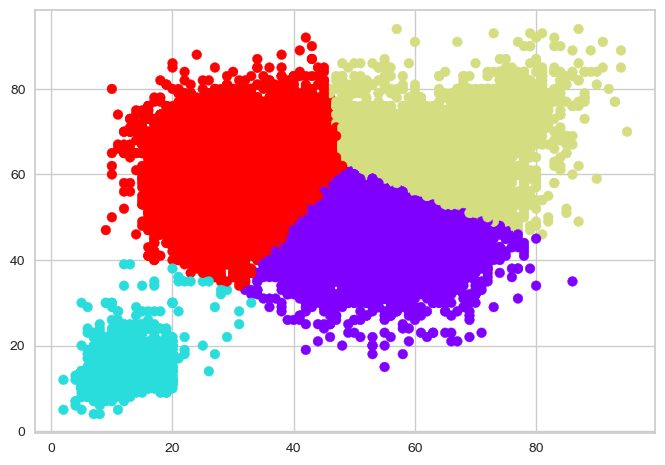

In [18]:
# code to create and fit the k-means++ (full) and also show the scatterplot with the k value from the elbow plot
kmeans = KMeans(init='k-means++', algorithm='full', n_clusters=4, random_state=0)
kmeans.fit(combinedX)
plt.scatter(combinedX['Finishing'], combinedX['HeadingAccuracy'], c=kmeans.labels_, cmap='rainbow')

The scatterplot of k-means with k = 4 shows completely different results compared to the scatterplot obtained using k-means and k-means++ with k = 2. The scatterplot shows four different clusters being created. The four clusters are denoted by the red, light-green, purple and light blue color.The four clusters are more equally distributed with the datapoints in the scatterplot graph. There seems to little overlapping of the datapoints between the clusters and all the points are properly distinguished between the clusters.We expected 4 clusters, since we increased the value from k = 2 to k = 4 but this scatterplot provides much accurate distinction between the clusters compared to scatterplots with k = 2. So based on this scatterplot the value of k being 4 could be a better value to consider.

Now lets see if another technique might do better (or worse).

## 1.2. Hierarchical Clustering Analysis (HCA)

The second technique discussed was the Hierarchical Clustering Analysis (HCA). 

**This explaination was done using the video lectures of Data Mining and Stastics on moodle made by Mr Peter Stikker**

**The images in the examples were taken from the video lectures made by Mr Peter Stikker**

This is a bit different approach towards finding a cluster as compared to the k-Means. This is a techinque for clustering in which a hierarchy of clusters is created in different types of model.

This techinque firstly considers all the datapoints in our model as clusters, then it tries to merge atleast two clusters and then make a cluster of that. This process is then repeated until one huge cluster is created.

This clustering techinque is two types of linkage: single linkage and single linkageL with 2D. Since our dataset uses two variables, let's understand how single linkage 2D works with an example:

Lets considered some random points on a data model, from the image below:
<div style="text-align: left;"><img src="../assignment_6/images/HCA_example_1.png" alt="part_6" width="200" height="200"></div>

The first step is look for the specific data points that are closer from their respective clusters next to each other.

<div style="text-align: left;"><img src="../assignment_6/images/HCA_example_2.png" alt="part_7" width="200" height="200"></div>

So the from the image above we can see that the green point on the bottom left of the green cluster is closest to the red point on the top right side of the red cluster(shown as d1). The red point at the bottom right of red cluster is closest to the blue point of the blue cluster on the left(shown as d2). And last but not least the green point on bottom right is closest to the blue point on the top(shown as d3).


The next step would be then to merge these two clusters that are nearest to each other, so from the image above we can see that the distance(d1) between the green and red cluster is the nearest. So from the example the output then will be shown below:

<div style="text-align: left;"><img src="../assignment_6/images/HCA_example_3.png" alt="part_8" width="200" height="200"></div>

The steps from above are then repeated, further to created one huge proper cluster.

This method of clustering is using 'single' method linkage in HCA. There are also other types of method which we will explore below in the next cell.


One selection to be made is the so-called 'linkage'. The four basic ones are 'single', 'complete', 'mean', and 'ward'.

**This explaination was done referencing the video lectures of Data Mining and Stastics on moodle made by Mr Peter Stikker**

**The images in the examples were taken from the video lectures made by Mr Peter Stikker**

**single linkage**: In this method we figure out the nearest distance by taking any two points in different clusters inside the graph.Then the clusters are merged to form on huge cluster. This method can be used with one-dimensional(1D) with one variable and two-dimensional(2D) two variables.The process on how the single linkage clustering occurs is already explained in the previous example.


**complete linkage**: In this method, we figure out the points furtherest from each in between the clusters in our graph. The distances are then calculated based on the farthest point and then form clusters, and then merged. 

Let's consider some random data points shown in the image below:
<div style="text-align: left;"><img src="../assignment_6/images/HCA_example_4.png" alt="part_9" width="200" height="200"></div>

The first step here will be to find the points that are far away from each other between the clusters.

<div style="text-align: left;"><img src="../assignment_6/images/HCA_example_5.png" alt="part_10" width="200" height="200"></div>

So from the image above, we can say that the distance(d1) between the green point in bottom right and the red point in top left is greater than the other points between those clusters.The distance(d2) between the red point in top-left and blue point in bottom-right is greather than the other points between those clusters and last but not least the distance between the blue point at bottom-right and green point in the middle is greater then the other points between those clusters.

The next step is to merge the two clusters having the shortest distance of all. so from the example we can see that the distnace between the green and red cluster is the shortest, so they are merged together to become one cluster. The output is shown below:

<div style="text-align: left;"><img src="../assignment_6/images/HCA_example_6.png" alt="part_10" width="200" height="200"></div>

The previous steps are then further repeated to create accurate clustering.

**mean linkage**: In this method a mean distance is calculated based upon the distances of datapoints in between the pair of one cluster and the other respective cluster. This method actually preoduces more efficient clusters as compared to the clusters in complete linkage. Let's understand how this works with an example:

Let's consider some random data points shown in the image below:
<div style="text-align: left;"><img src="../assignment_6/images/HCA_example_4.png" alt="part_9" width="200" height="200"></div>

The first step is to figure out the average distance for each bunch of datapoint from one cluster to another.

<div style="height: auto;">
<img src="../assignment_6/images/HCA_example_7.png" alt="part_9" width="200" height="200">
<img src="../assignment_6/images/HCA_example_8.png" alt="part_10" width="200" height="200">
<img src="../assignment_6/images/HCA_example_9.png" alt="part_11" width="200" height="200">
<img src="../assignment_6/images/HCA_example_10.png" alt="part_12" width="200" height="200">
</div>

So from the example we can start from calculating the distance from the red point to all the points in the green cluster shown in the first image from left, then we can calculate the distance from the red point on the left to all the points in the green cluster shown in the second image and then keep on calculating the distances from all red points to the green points in the cluster shown in images after the second image. After calculating all the distances we can now calculate the average distance between the red and green clusters. We can then repeat the same process between the green and blue clusters and then also calculate the average distance between those clusters. Then we also repeat the same process between the red and blue clusters and calculate the average of distance between those clusters.

After you finish executing the previous step, the next step would be combine the two clusters which have the smallest average distance. The process is then repeated again. 


**ward linkage**: This method is relatively a bit simple to understand the only difference is that in this method we will calculate the difference between the sum of squares between the two datapoints within the clusters, instead of only the distance. So whichever distance between the two clusters is smallest, those particular set of clusters will be merged. Thus forming One big cluster.  

In the Jupyter Notebook from the lecture there was a function that can compare these four options in one go. Lets use that here as well.

In [36]:
# copy the compareLinkage function, and if you like you can adjust it.
# code taken from jupyter notebook made by Mr Peter Stikker
def compareLinkage(myData, k):
    hca, axs = plt.subplots(2,2, constrained_layout=True)

    hierClust = AgglomerativeClustering(linkage='single', n_clusters=k)
    hierClust.fit(myData)
    axs[0,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,0].set_title('Single')

    hierClust = AgglomerativeClustering(linkage='average', n_clusters=k)
    hierClust.fit(myData)
    axs[0,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,1].set_title('Average')

    hierClust = AgglomerativeClustering(linkage='complete', n_clusters=k)
    hierClust.fit(myData)
    axs[1,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,0].set_title('Complete')

    hierClust = AgglomerativeClustering(linkage='ward', n_clusters=k)
    hierClust.fit(myData)
    axs[1,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,1].set_title('Ward')

    plt.show()

Now lets use it on the Soccer data. We assumed there to be 2 clusters, so we'll stick with our k = 2 for now.

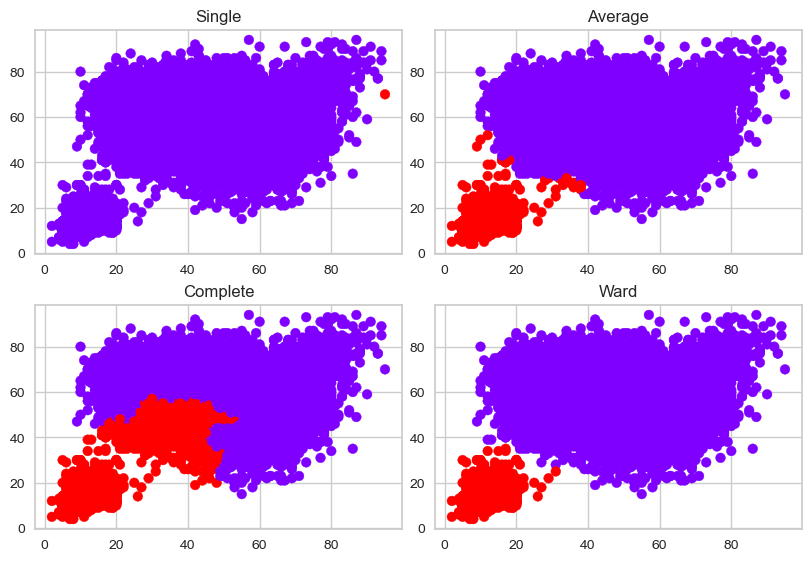

In [37]:
# code to create the four HCA linkage models and scatterplot (use the function)
compareLinkage(np.asarray(combinedX), 2)

The scatterplot above shows different output results for each and every type of linkages.The single linkage shows one big cluster in purple color and one datapoint in red signifying the other cluster. This method groups the data points into cluster based on how close the data points are to each other in the scatterplot. Therefore this means that the data points in our dataset are extremely close to each other and have been grouped together, forming one big cluster.The data point marked in red seems to far away from the other data points so this point is maybe be an outlier and not particularly a cluster since single linkage trend to be very sensitive towards outliers.This could state that single linkage is not particularly a good techinque to perform for this dataset. The other linkage methods show two clusters being formed, and each of them shows the formation of the clusters in a different manner. None of the linkages other the single shows any kind of outliers in the data. In the average linkage, there seems to be some overlapping between the data points between the clusters but we do see distinctive clusters.This could be because  the shortest average distances between each cluster is taken into account. The clusters in the complete linkage are not equally distributed and seperated between each other.This could be due to the fact that it takes that data points that are very far from each other and then merges the clusters based on smallest distances. Therefore we have some irregular distinction of the clusters. The ward linkage, accurately seperates the clusters from each other. So we can see that there is one small cluster and one large cluster and there seems to be no overlapping between the datapoints of one cluster and another. This could be beacuse the ward linkage does not use the distance and uses the variation between the clusters.


Would the k = 2 perhaps again be different? Lets find out. We can use our 'elbowPlot' function here as well.

Results using AggolmerativeClustering 'single' below:


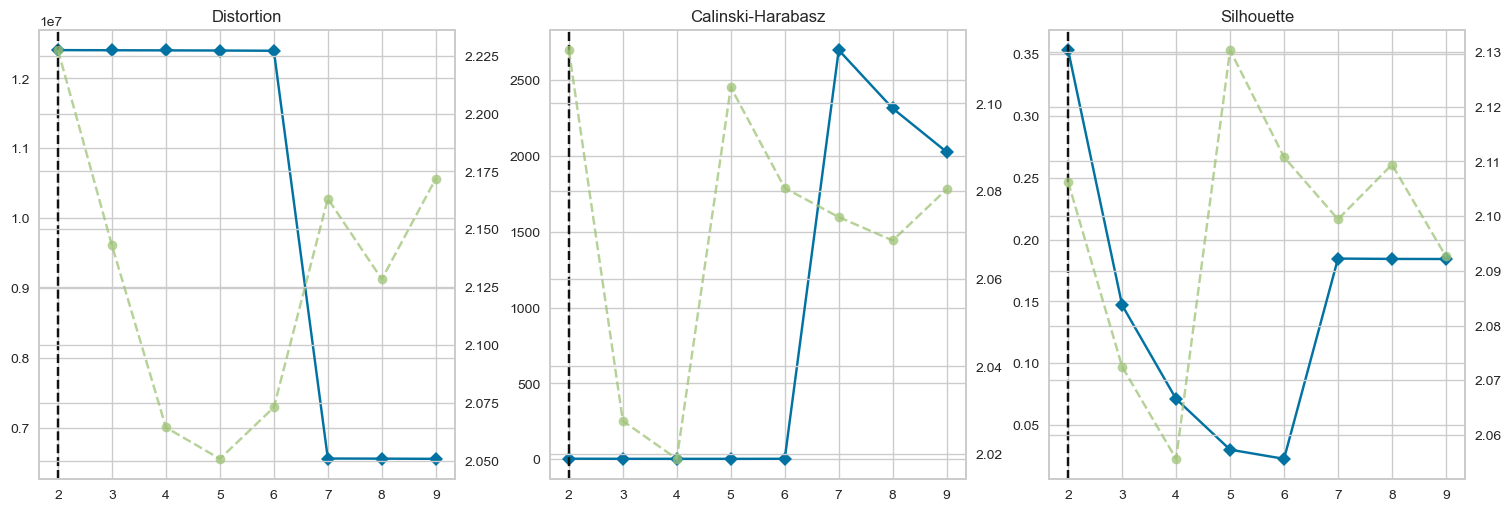

In [14]:
# code to run the elbowPlot four times (ones for each different linkage) (this might take quite some time)
# print something between so you know which output belongs to which linkage
print("Results using AggolmerativeClustering 'single' below:")
linkage_clust_single = AgglomerativeClustering(linkage='single', n_clusters=2)
elbowPlot(combinedX, linkage_clust_single, (2, 10))

Results using AggolmerativeClustering 'complete' below


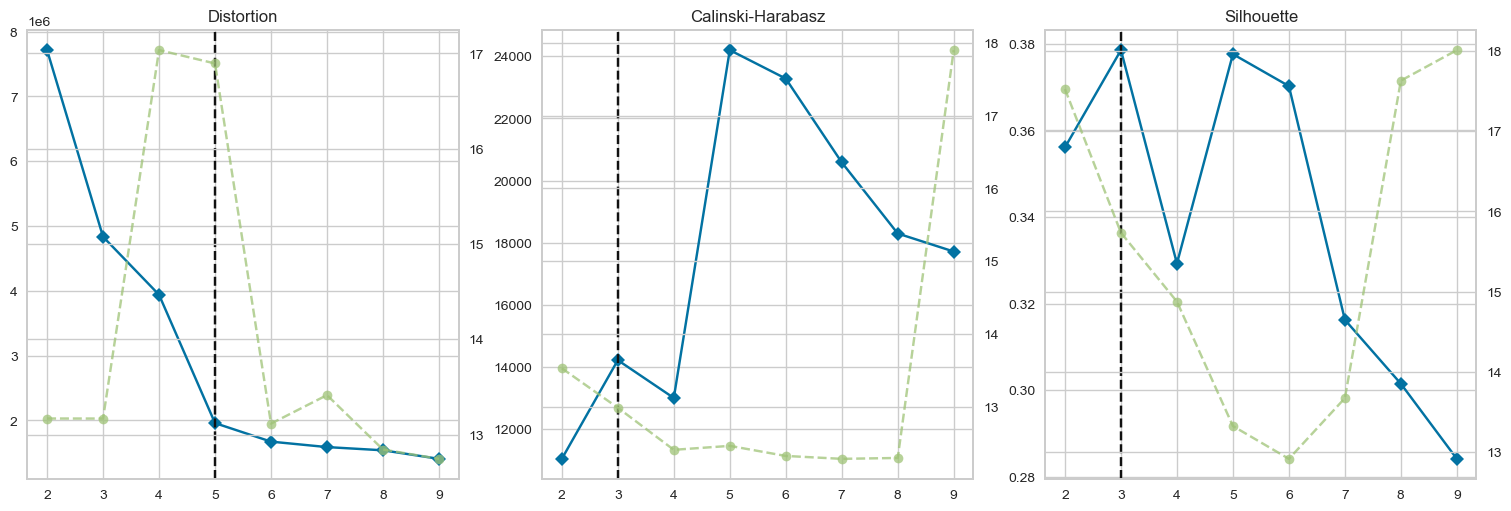

In [15]:
print("Results using AggolmerativeClustering 'complete' below")
linkage_clust_complete = AgglomerativeClustering(linkage='complete', n_clusters=2)
elbowPlot(combinedX, linkage_clust_complete, (2, 10))

Results using AggolmerativeClustering 'mean' below


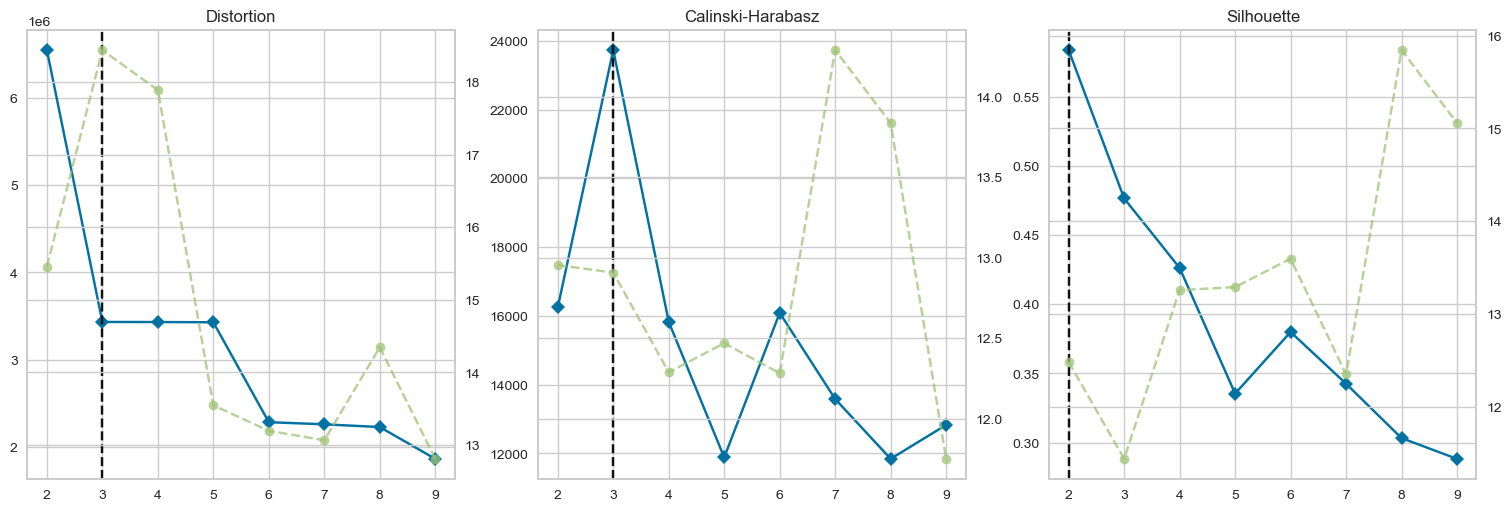

In [17]:
print("Results using AggolmerativeClustering 'mean' below")
linkage_clust_mean = AgglomerativeClustering(linkage='average', n_clusters=2)
elbowPlot(combinedX, linkage_clust_mean, (2, 10))

Results using AggolmerativeClustering 'ward' below


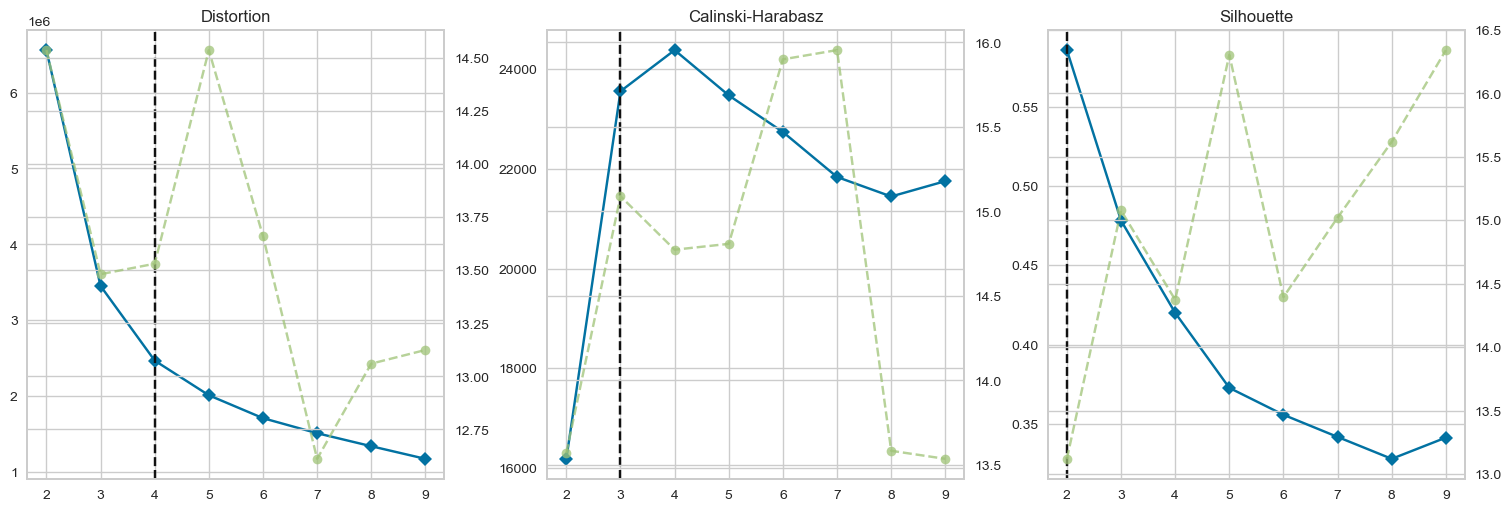

In [18]:
print("Results using AggolmerativeClustering 'ward' below")
linkage_clust_ward = AgglomerativeClustering(linkage='ward', n_clusters=2)
elbowPlot(combinedX, linkage_clust_ward, (2, 10))

Based on the results obtained from running the elbowPlot function with the appropriate linkages: single, complete, average, and ward we find that have the following results on k-value shown on frequency table mentioned below:

| k-value | Frequency |
| --- | --- |
| 2 | 5 |
| 3 | 5 |
| 4 | 1 |
| 5 | 1 |


From the table above excluding the k-value of 2 we can see that, the frequency of the k-value 3 is the is highest, based on the results obtained from the graphs above. So the most common modal suggestion for k-value is 3.

A few different k-s are suggested by the elbow plot. Lets see how our HCA performs if we use those.

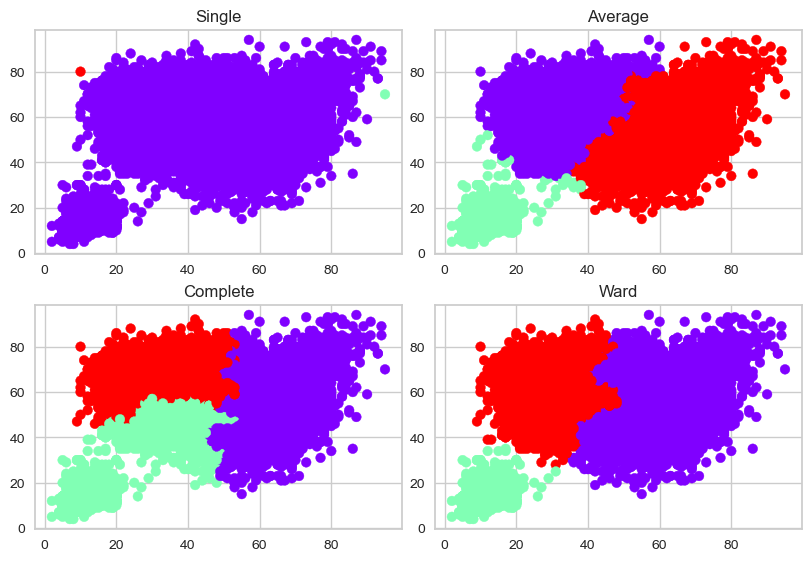

In [11]:
# code to show the four linkages for the different suggested k's from the elbow plots.
# comparing linkages with k = 3
compareLinkage(np.asarray(combinedX), 3)

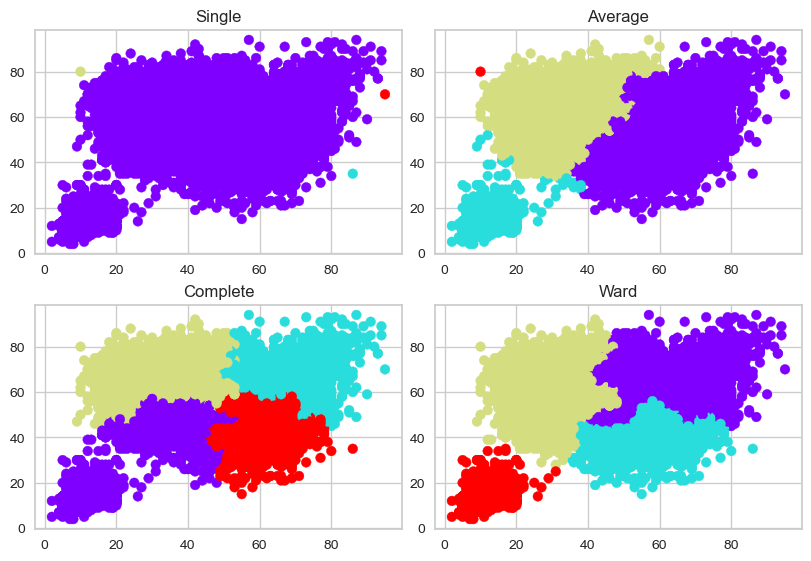

In [12]:
compareLinkage(np.asarray(combinedX), 4)

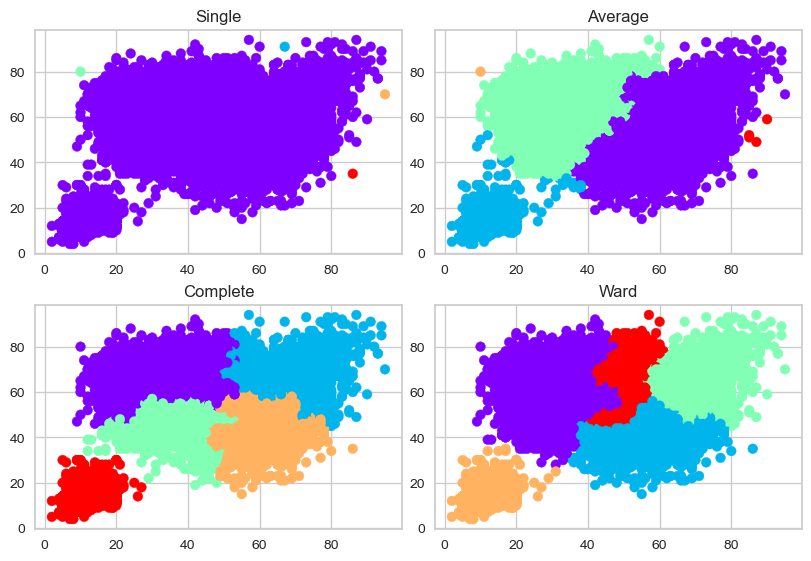

In [15]:
compareLinkage(np.asarray(combinedX), 5)

The single linkage performs one huge cluster and outliers in all the different types of k-values that we explored using the compareLinkage function, therefore this is not an optimal method to perform clustering on our dataset.The average linkage created three proper clusters when the value of k was set to 3 but also produced a lot of outliers when the value of k was set to 4 and 5, so therefore the average linkahe was not able to efficiently cluster the data properly so the average linkage in our HCA techinque is not particularly suitable to cluster the data efficiently with our dataset, so therefore this is also not an optimal method to perform clustering.The complete linkage doesen't necessarily cluster our data properly when the value of k is set to 3 and 4, we can see that in the scatterplot of k = 3 and 4, especially in bottom left cluster some datapoints are going inside the big cluster which makes sense based on the method function, but as the k-value gets bigger the complete linkage tends cluster the data in our dataset efficiently for example: the scatterplot of complete linkage when the value of k is set to 5. At last but not least we see the ward linkage with consistent performance, by efficiently clustering and seperating the data into clusters and have almost the similar cluster sizes among each other. So we can comclude that when it comes to HCA techinque the ward linkage tends to perform efficient clustering with our dataset.

The HCA techinque, espcially using the ward linkage was able to efficiently make the clusters of our data properly, when we set the value of k to 2, 3, 4 and 5. The k-means techinque, when comparing the scatterplot results of k = 2, the data points of small cluster seem to be overlapping with the data points of the big cluster. This is not the case with the HCA using the ward linkage. So therefore HCA techinque performed better clustering analysis compared to the k-means.

The dendrogram is also often used. Lets at least produce it once.

In [5]:
# code to show at least one dendrogram. (if your kernel crashes on this, show a dendrogram of a selected portion of the data)
#PLEASE NOTE: The Kernel crashes on this so run the code at your own risk.
dendrogram_linkage = linkage(np.asarray(combinedX), method='single')
dendrogram(dendrogram_linkage)
plt.show()

: 

: 

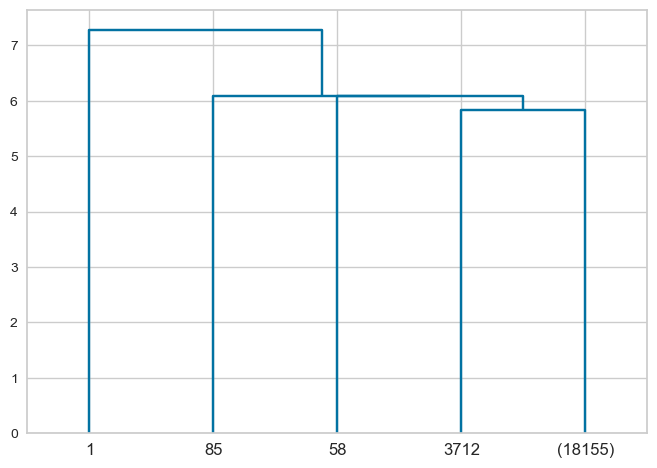

In [13]:
# if dendrogram is too large, code to zoom in.
#since our dendrogram is way too big, we will see a set of selected values and zoom in
dendrogram_linkage = linkage(np.asarray(combinedX), method='single')
dendrogram(dendrogram_linkage, p=3, truncate_mode='level')
plt.show()

Allright, two techniques down, lets move on to the third...

## 1.3. DBSCAN

The third technique discussed was the Density Based Spatial Clustering of Applications with Noise (DBSCAN).

**This explaination was done using the video lectures of Data Mining and Stastics on moodle made by Mr Peter Stikker**

**The images in the examples were taken from the video lectures made by Mr Peter Stikker**

The DBSCAN method looks for dense layers of clusters it can find within our scatterplot graph and tries to group them together.DBSCAN can be used with one-dimensions(1D) variable and with two dimensions(2D) variable. 

Since, in this assignment we are using two variables let us understand how DBSCAN works with 2-dimensional(2D) variables.

Below we have a random scatter plot with the datapoints:

<img src="../assignment_6/images/DBSCAN_example_1.png" alt="part_13" width="200" height="200">

We define an eplsilon of lets say  five cm which is the radius of all the data points present inside the neighbourhood. We then define the minimum number of datapoints required to be a part of that particular cluster, so let's say three.

<div style="height: auto;">
    <img src="../assignment_6/images/DBSCAN_example_2.png" alt="part_14" width="200" height="200">
    <img src="../assignment_6/images/DBSCAN_example_3.png" alt="part_15" width="200" height="200">
    <img src="../assignment_6/images/DBSCAN_example_4.png" alt="part_16" width="200" height="200">
</div>

So we choose a random point marked in orange, and draw a circle with radius of 5cm around that point(shown in the first image from left), and we see that there are three points present inside the cluster, so therefore that meets the requirement to be a part of one particular cluster which is lets say the red cluster. So we mark the point present in the red cluster and shown in the next image after that. Lets take another point and draw a circle around it(as shown in the next image marked in orange).This point does not meet the requirements of the minimum number of datapoints so this point is called the border to the red cluster. So like that we keep on selecting each point and draw a circle around it and check if it meets the requirements of three points to be part of the three point cluster.

Ocasionally while performing the DBSCAN techinque we will come across some points that does not have any points around them, In this case we will call this point an outlier, unless you choose another point where that outlier point comes inside the circle and meets the three point requirements of that cluster. An example of how an outlier looks like is mentioned below:

<img src="../assignment_6/images/DBSCAN_example_5.png" alt="part_14" width="200" height="200">

So this is how the DBSCAN techinque works, now of course doing this by hand seems to be tedious task so let us look at how python libraries can help us in performing this techinque with our dataset.




This method will require two input parameters. The epsilon and the min number of samples.

As the min number of samples I have chosen for 1000.

For the epsilon we can create a visual aid using the nearest neighbors.

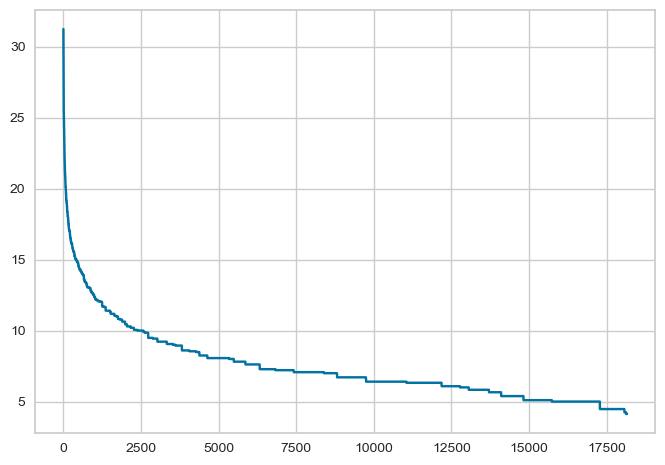

In [5]:
# code to show the nearest neighbors plot with different distances
nearest_neighbour = 1000
nNeighbours = NearestNeighbors(n_neighbors=nearest_neighbour).fit(np.asarray(combinedX))
distances, indices = nNeighbours.kneighbors(np.asarray(combinedX))
distanceDec = sorted(distances[:, nearest_neighbour-1], reverse=True)
plt.plot(list(range(1, combinedX.shape[0] + 1)), distanceDec)

The above scatterplot represents represents all the optimal epsilon values on the y-axis and the x-axis represents all the samples in our dataset. So from the scatterplot the elbow seems to occur at maybe 12.5 or 13. I will take the round figure 13 as the value for epsilon.     

Now that we have a min number of points for a neighborhood, and an epsilon we can run the DBSCAN.

In [11]:
# code to create and fit the DBSCAN model.
dbscan = DBSCAN(eps=13, min_samples=1000)
dbscan.fit(combinedX)

DBSCAN(eps=13, min_samples=1000)

Lets look at the results:

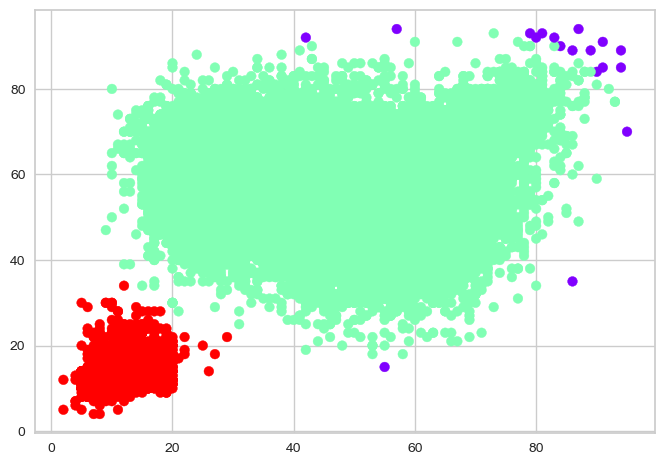

In [13]:
# code to show the scatterplot with the clusters
plt.scatter(combinedX['Finishing'], combinedX['HeadingAccuracy'], c=dbscan.labels_, cmap='rainbow')

The scatterplot produces two clusters, the one small cluster marked in red and one big cluster marked with the light green color. The scatterplot also shows some outliers which are marked in purple color.The scatterplot does not cluster the data accurately. The main reson behind this is the density of each clusters, the DBSCAN techinque is only works properly especially in the regions of the data that have high density. So if a particular data point is in an area of low density, the DBSCAN does not seem to work very well. This techinque also seems to be sensitive towards outliers, due to which you can see a lot of outliers in our scatterplot.

Overall this techinque is not suitable to perform clustering with our dataset compared to the other models. The other models, HCA and k-means provide much accurate clustering, with consistent cluster size and seperation compared to the DBSCAN techinque.

There was one more technique discussed, the almost perfect HDBSCAN...

## 1.4. HDBSCAN

The fourth technique was the Hierachical Density Based Spatial Clustering of Applications with Noise (HDBSCAN).

**This explaination was done referencing the video lectures on moodle made by Mr Peter Stikker**

**The images in the examples taken from the video lectures on moodle made by Mr Peter Stikker**

HDBSCAN is actually an upgraded version of the DBSCAN techinque, this techinque provides more workable and high-powered and have more additional features than the DBSCAN. Unlike the method DBSCAN, HDBSCAN is performed in six steps: 

The first step determine core distances which is determining for each point the radius of a circle with that particluar datapoint as the center of the circle which contains the minimum points defined before to be a part of that particular cluster.Then you keep on repeating the steps. The example of step 1 is shown below:

<img src="../assignment_6/images/HDBSCAN_example_1.png" alt="part_15" width="200" height="200">


Once we have determined the core distances, next step is to determine the mutual reachibility which is the core radius of point A and core radius of B and the distance of point A and B. We then select the smallest distance of all from those distance. An example of how this looks is shown below:

<img src="../assignment_6/images/HDBSCAN_example_2.png" alt="part_16" width="200" height="200">

After previous step, for the Hierarchial section in the HDBSCAN we build a minimum spanning tree. In this step we connect all the datapoints with other datapoints. We then use the mutual reachability score, which means how easy it is to reach these points. The further the points are from each other the thicker will the line be. An example is shown below:

<img src="../assignment_6/images/HDBSCAN_example_3.png" alt="part_17" width="200" height="200">

Then we start eliminating the lines from tickness to thinesses making sure that each datapoint is still connected with each other.So after eliminating each possiable lines. We get the following result below:

<img src="../assignment_6/images/HDBSCAN_example_4.png" alt="part_18" width="200" height="200">

The next step is creating a dendrogram. In this step we filter the edges of the tree by distance and then loop over them, which creates a newly merged cluster for every single edge. An example of this is shown below:

<img src="../assignment_6/images/HDBSCAN_example_5.png" alt="part_19" width="400" height="200">


Other then dendrogram, we can also use condensed tree algorithm which states how many points are inside a cluster, so larger the radius greater the points and smaller the radius smaller the points. This is done until we reach the minimum sample size. An example of this is shown below:

<img src="../assignment_6/images/HDBSCAN_example_6.png" alt="part_20" width="400" height="200">

After using the condensed tree algorithm we can now choose a good cluster. The defination of a good cluster is that it stays in the graph for a very long time on the graph. So from the graph above we can determine that the circle marked in yellow is a good cluster and has a lot of points. So the points lower than the marked cluster stay for a lower period of time so therefore are not an optimal choice.

So this is how the HDBSCAN techinque works, HDBSCAN also has very strong dectection of outlier scores, so it is able to determine the outlier scores of very small or very noisy clusters. The HDBSCAN uses 'Hierachical' density which means it uses a tree format which indeed also helps to identify clusters with different sizes and densities accurately. 




One big advantage of this technique is that it only requires one input parameter: the min samples. We can use the same as from DBSCAN. So lets dive right in.

In [23]:
# code to create and fit the HDBSCAN model.
hdbscanModel = hdbscan.HDBSCAN(min_samples=1000, gen_min_span_tree=True)
hdbscanModel.fit(combinedX)

HDBSCAN(gen_min_span_tree=True, min_samples=1000)

And the result....

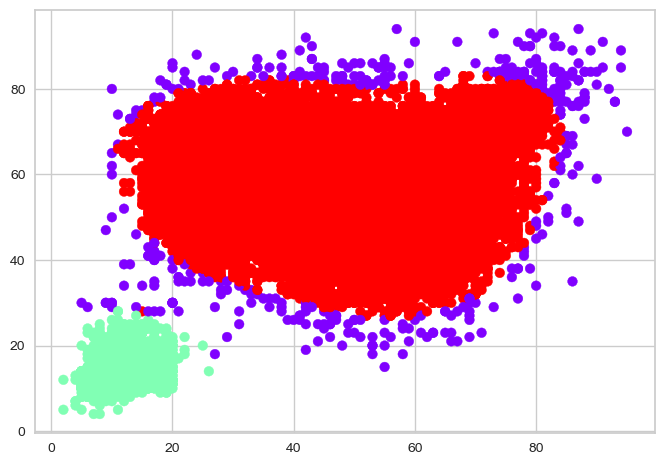

In [25]:
# code to show the scatterplot with the clusters
plt.scatter(combinedX.iloc[:, 0], combinedX.iloc[:, 1], c=hdbscanModel.labels_, cmap='rainbow')

The scatterplot below produces two clusters, the small cluster marked in light green color and the large cluster marked in blue color.The scatterplot also shows some purple datapoints which are outliers and does not necessarily belong to any cluster. There seems to be some inaccuracies in the scatterplot like for example we see a datapoint of red cluster embeded around the light green cluster. Like the method DBSCAN the HDBSCAN does not cluster the data accurately. This may be due to the fact that the HDBSCAN does not seem to perform very well on datasets having different sizes of the clusters and it also seems that the method HDBSCAN is also sensitive to the ouliers due to which we have a lot of outliers in our scatterplot.

Overall by looking at the scatterplot graph this techinque is also not suitable for clustering with our dataset. So thereofore the other techinques k-means and HCA are suitable techinques for clustering of our data.

The HDBSCAN actually goes through a few steps: The minimum spanning tree => the dendrogram => the condensed tree.

In the Jupyter Notebook from the lecture, a small function was made to show these. 

In [7]:
# code of the HDBSCANvisuals function, adjust if needed/wanted/improvements.
# This code is taken from the jupyter notebook made by Mr Peter Stikker
def HDBSCANvisuals(hdbscanModel_sample):
    
    # set the plotting stage for later
    plt.figure(figsize=(10,3))

    plt.subplot(131)
    plt.gca().set_title('Min. Spanning Tree')
    hdbscanModel_sample.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80,edge_linewidth=2)

    plt.subplot(132)
    plt.gca().set_title('Dendrogram')
    hdbscanModel_sample.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

    plt.subplot(133)
    plt.gca().set_title('Condensed Tree')
    hdbscanModel_sample.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

    # Show the results
    plt.show()

So for those who like to see what is going on in these stages:

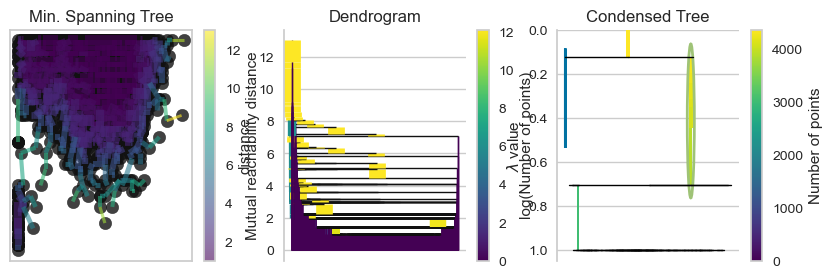

In [8]:
# code using the function to show the three visuals. Note if your kernel crashes with this, you can use a sample set from the data.
sample_data = pd.read_csv("Soccer2019C.csv")

sample_data_filtered = sample_data[[ 'Finishing', 'HeadingAccuracy' ]]
subset_data = sample_data_filtered[(sample_data_filtered['Finishing'] >= 20) & (sample_data_filtered['HeadingAccuracy'] < 50)]

hdbscanModel_sample = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True)
hdbscanModel_sample.fit(subset_data)

HDBSCANvisuals(hdbscanModel_sample)

## 1.5. Adjusting the Data

We used the unadjusted data, but often a normalization is used. What would the results have been, if we had first normalized our scores using the StandardScaler.

Lets find out.

First transform the data:

In [42]:
# code using the StandardScaler to transform the data.
scaler = StandardScaler()
scaler.fit(combinedX)

scalercombinedX = scaler.transform(combinedX)

dbscan_scaler = DBSCAN(eps=13, min_samples=1000)
dbscan_scaler.fit(scalercombinedX)

DBSCAN(eps=13, min_samples=1000)

Now lets see all the results again, but using this scaled data.

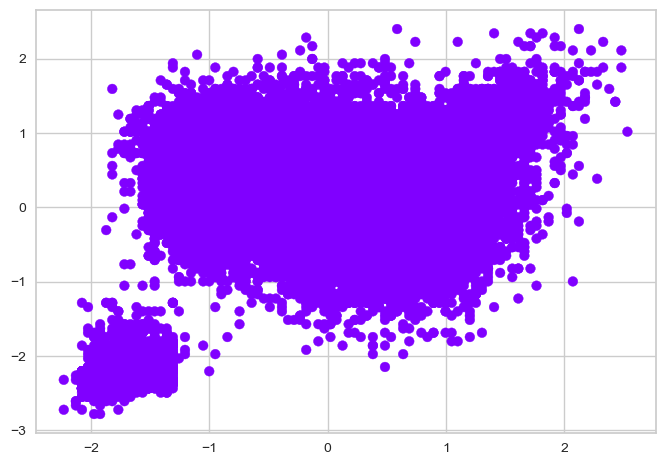

In [44]:
# long code cell with all the different models using the scaled data. Output should each time be the scatterplot.
# you could add some other cells first to find perhaps some parameters.

#using the dbscan
plt.scatter(np.asarray(scalercombinedX[:, 0]), np.asarray(scalercombinedX[:, 1]), c=dbscan_scaler.labels_, cmap='rainbow')

In [45]:
#model using hdbscan
hdbscan_scaler = hdbscan.HDBSCAN(min_samples=1000, gen_min_span_tree=True)
hdbscan_scaler.fit(scalercombinedX)

HDBSCAN(gen_min_span_tree=True, min_samples=1000)

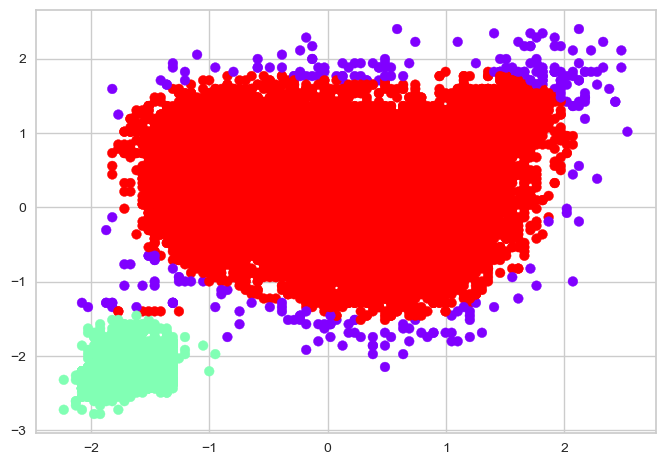

In [46]:
#scatterplot with hdbscan
plt.scatter(np.asarray(scalercombinedX[:, 0]), np.asarray(scalercombinedX[:, 1]), c=hdbscan_scaler.labels_, cmap='rainbow')

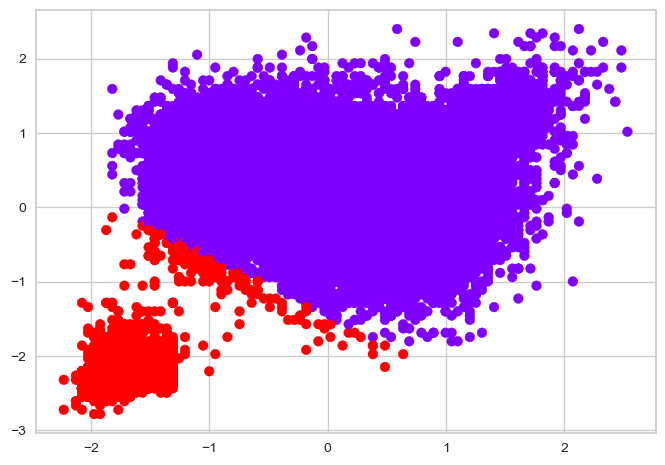

In [47]:
kmeans_elkan_plus = KMeans(init='k-means++', algorithm='elkan', n_clusters=2, random_state=0)
kmeans_elkan_plus.fit(scalercombinedX)
plt.scatter(np.asarray(scalercombinedX[:, 0]), np.asarray(scalercombinedX[:, 1]), c=kmeans_elkan_plus.labels_, cmap='rainbow')

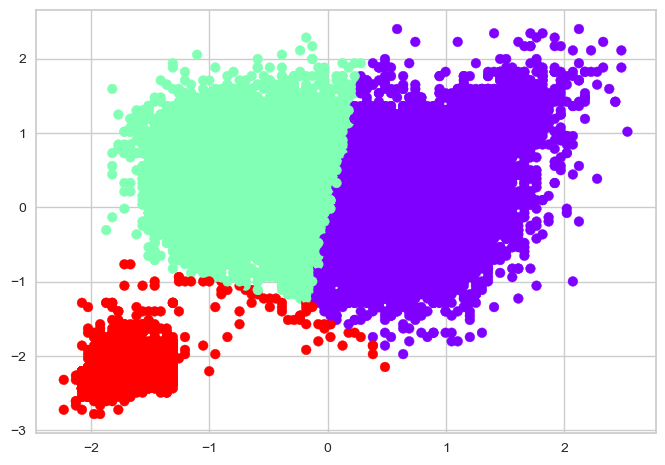

In [41]:
kmeans_elkan_plus = KMeans(init='k-means++', algorithm='elkan', n_clusters=3, random_state=0)
kmeans_elkan_plus.fit(scalercombinedX)
plt.scatter(np.asarray(scalercombinedX[:, 0]), np.asarray(scalercombinedX[:, 1]), c=kmeans_elkan_plus.labels_, cmap='rainbow')

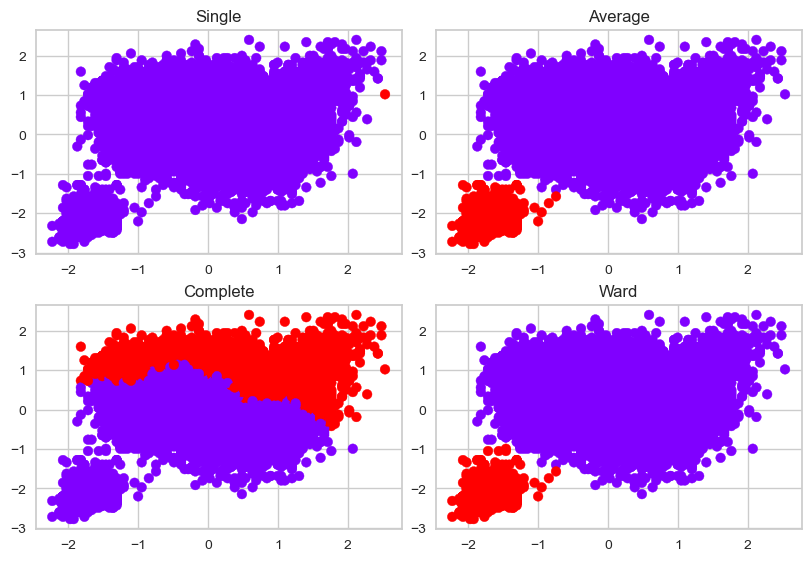

In [38]:
#scatterplot using different linkage of HCA methods
compareLinkage(np.asarray(scalercombinedX), 2)

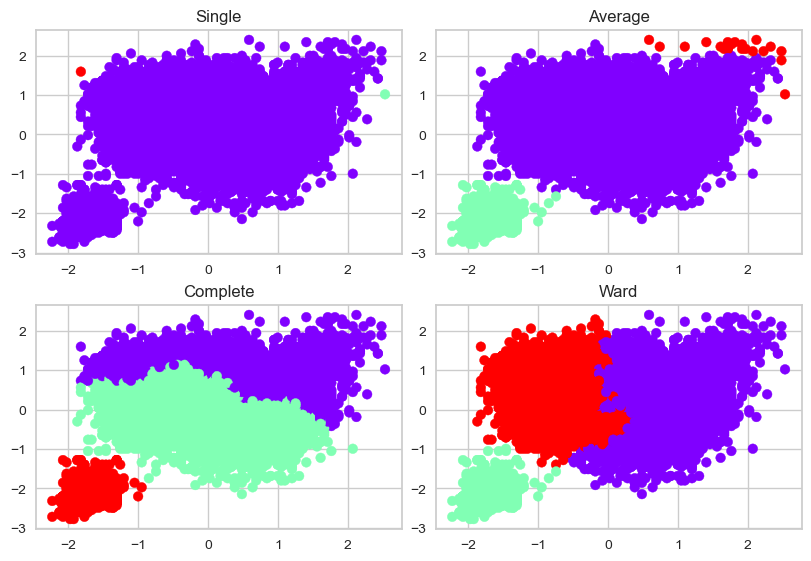

In [39]:
compareLinkage(np.asarray(scalercombinedX), 3)

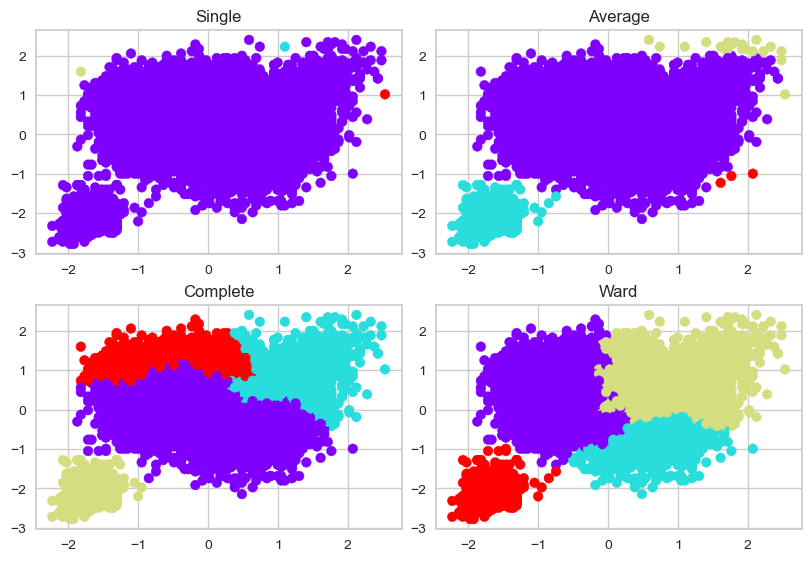

In [48]:
compareLinkage(np.asarray(scalercombinedX), 4)

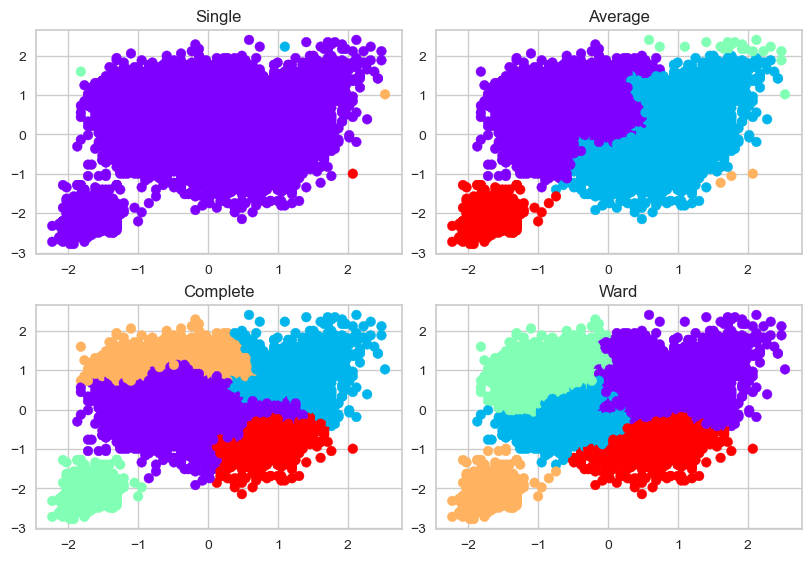

In [51]:
compareLinkage(np.asarray(scalercombinedX), 5) 

The DBSCAN techinque now only identifies one big cluster. There is no other cluster or any outliers identified by using the DBSCAN techinque using the scaled data. The HDBSCAN techinque does not show any significant changes using the scaled data when compared with output obtained without using any scaled data, so this techinque still produces two clusters: one small cluster and one big cluster marked in light green and red color, followed by the purple datapoints as outliers. There seems to be no significant changes within the output of the scatterplot using the k-means techinque specifically the kmeans++.There seems to be some overlapping but the output produced the desired number of clusters based on the k value being passed as the parameter. The HCA techinque using the linkages: single, average, complete and ward does produce some changes when using the scaled data. There are no significant changes when using the single linkage the output is pretty much the same as it was without using the scaled data. The output for average linkage is different as compared to the output obtained without using the scaled data. The average linkage seems to not cluster the data efficiently and produce outliers when compared using different k values with scaled data.The complete and the ward linkage does not seem to have any significant changes when compared to the results obtained without using the scaled data.

<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template for those chapters is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 2. Improved Visualisation

The basic scatterplot can become a big blur, especially when you have a lot of datapoints.

*note: you can also use the clusterable_data.npy or another dataset, but it has to be one with a LOT of datapoints*

In [ ]:
# code to load dataset if not already loaded


If we create a scatterplot of **<span style='background:yellow'>\<your first choosen variable></span>** and **<span style='background:yellow'>\<your second choosen variable></span>**

In [ ]:
# code to create the basic scatterplot


It looks like a big blur.

One technique to overcome this, is to use opacity. See for an example: https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2019/04/Scatter_Plot_transparent_with_log_scale_Seaborn_Python.jpeg

Here's a function that can create the scatterplot like this, for a given model and dataset.

In [ ]:
# code of a function that takes the data as input and shows the scatterplot with the opacity. The level of opacity can also be a parameter.


Here's an example of using the function:

In [ ]:
# code using the function to show the scatterplot with opacity.


Another method to deal with even larger datasets is a heatmap. An example is shown below.

![image heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvQZGu7SMVBCh6KIcF7toUqRpak2qWwQNkkhpZzv30hFbwYdDk&usqp=CAU)

This usually requires a Gaussian kernel, and is often slower than the previous methods.

So lets create a function for this as well.

In [ ]:
# code of a function that takes the data as input and shows the scatterplot as a heatmap. The color scaling could be an optional parameter.


Here's an example of using the function:

In [ ]:
# code using the function to show the heatmap.


# 3. A New Technique

In the Jupyter Notebook from the lecture, we discussed quite a few techniques:

* k-means (with Lloyd and Elkan)
* k-means++ (with Lloyd and Elkan)
* HCA Single linkage
* HCA Complete linkage
* HCA Mean linkage
* HCA Ward linkage
* DBSCAN
* HDBSCAN*

In the appendix there was also:

* Affinity Propagation
* Spectral Clustering
* Mini-batch K-means
* k-medoids
* HCA Centroid linkage
* HCA Median linkage
* Mean Shift
* OPTICS

However, as shown on the slides (near the end) there are a lot more. 

In this chapter the **<span style='background:yellow'>\<your chosen technique that is not listed above></span>** is discussed.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? How is it compared to the other techniques discussed? You probably need a few cells for this></span>**

In [ ]:
# code to create and fit the model (perhaps another dataset is also required?)


In [ ]:
# code to show the result


# 4. Categorical Data

As with the clustering, the categorical data is a special case. In this chapter we'll describe one way to cluster using categorical data.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? You probably need a few cells for this></span>**

In [ ]:
# code to create and fit the model (perhaps another dataset is also required?)


In [ ]:
# code to show the result in a scatterplot with the clusters.


# 5. Elbow as a Number
The elbowPlot gives a nice visual tool. But I'd like to have the resulting k-value as a number, so I can use it as an input parameter for some loops over different models.

I couldn't find a method to extract the result from the KElbowVisualizer. So we'll have to create something ourselves. Perhaps 'from kneed import KneeLocator' can help here...

Below is a function that will find the knee/elbow point for each of the three metrics, and returns the results as an array.

In [ ]:
# code for the above described function


In [ ]:
# code as example to use the function
